<a href="https://colab.research.google.com/github/Suji04/RIT-DSCI-633-FDS/blob/main/Assignments/DSCI_633_Assignment_3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions to run this notebook:
Upload "train.csv", "train.csv" and "gender_submission.csv" then run all cells.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Dealing with missing values

In [4]:
train_data.isnull().sum() * 100 / len(train_data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
test_data.isnull().sum() * 100 / len(test_data)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Cabin feature contains too many (over 77% ) missing values in both train and test set. Hence, we should discard this feature. But, Age, Fare and Embarked have a low percentage of missingness. So, we should try to fill these missing values.

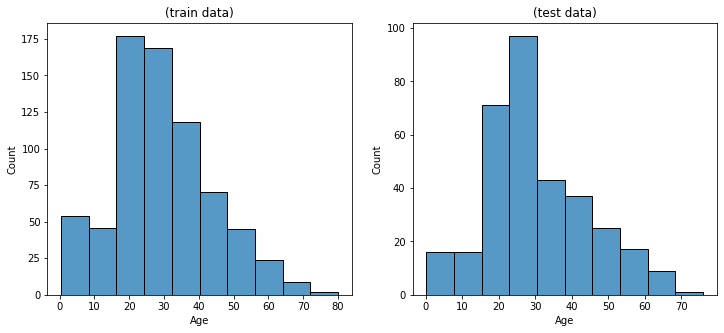

In [6]:
fig, ax = plt.subplots(figsize = (12, 5))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data=train_data, x="Age", bins=10)
ax1.title.set_text("(train data)")

ax2 = plt.subplot(1, 2, 2)
sns.histplot(data=test_data, x="Age", bins=10)
ax2.title.set_text("(test data)")

Age follows a skewed distribution in both dataset. Hence, we will replace the missing values with the median.

 

In [7]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Age"] = test_data["Age"].fillna(train_data["Age"].median())

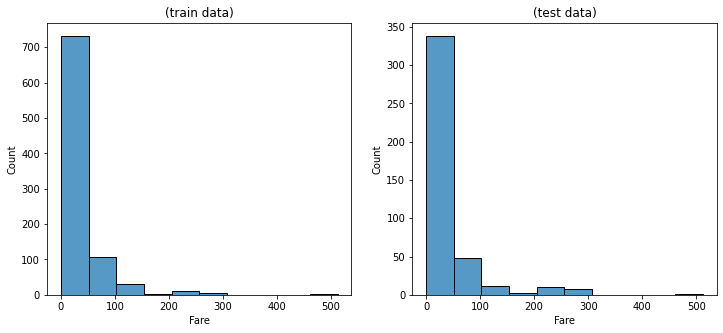

In [8]:
fig, ax = plt.subplots(figsize = (12, 5))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data=train_data, x="Fare", bins=10)
ax1.title.set_text("(train data)")

ax2 = plt.subplot(1, 2, 2)
sns.histplot(data=test_data, x="Fare", bins=10)
ax2.title.set_text("(test data)")

Fare also follows a skewed distribution in both dataset. Hence, we will replace the missing values with the median.

In [9]:
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].median())

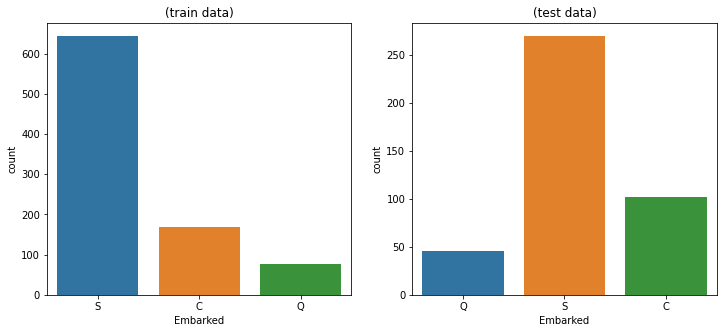

In [10]:
fig, ax = plt.subplots(figsize = (12, 5))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x="Embarked", data=train_data)
ax1.title.set_text("(train data)")

ax2 = plt.subplot(1, 2, 2)
sns.countplot(x="Embarked", data=test_data)
ax2.title.set_text("(test data)")

In both dataset, we have a majority class ('S'). So, we will replace the missing values with the mode (i.e. 'S')

In [11]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

## Dealing with categorical variables
We have got 3 categorical variables (Pclass, Sex and Embarked) in our dataset. We must encode these into numbers before feeding the model. Here, we are using one hot encoding.

In [12]:
train_data = pd.get_dummies(train_data, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Pclass", "Sex", "Embarked"], drop_first=True)

## Feature selection

In [13]:
train_data.columns.unique

<bound method Index.unique of Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')>

The following features: PassengerId, Name, Ticket do not contain any useful informaion. Hence, we are going to discard these and take the remaining features for training our model.

## Building feature matrix and target vector

In [14]:
X  = train_data[["Age", "SibSp", "Parch", "Fare", "Pclass_2", "Pclass_3", 
                 "Sex_male", "Embarked_Q", "Embarked_S"]].values
np.shape(X)

(891, 9)

In [15]:
y = train_data["Survived"].values
np.shape(y)

(891,)

## Train-test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=21092021)

## Normalizing numerical variables

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:,:4] = scaler.fit_transform(X_train[:,:4])
X_test[:,:4] = scaler.transform(X_test[:,:4])

## Model: Decision tree classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 20092021)

## Hyperparameter tuning with Grid-search Cross-validation

In [19]:
search_space = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [3, 6, None],
}

In [20]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(estimator = dt_model,
                  param_grid = search_space,
                  scoring = ["f1", "accuracy"],
                  refit = "f1",
                  cv = 10,
                  verbose = 4)

In [21]:
GS.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, accuracy=0.819, f1=0.735, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, accuracy=0.792, f1=0.737, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, accuracy=0.845, f1=0.776, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, accuracy=0.845, f1=0.776, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, accuracy=0.789, f1=0.717, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, accuracy=0.704, f1=0.604, total=   0.0s
[CV] criterion=gini, max_depth=3 ..............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=6, accuracy=0.859, f1=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, accuracy=0.873, f1=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, accuracy=0.789, f1=0.717, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, accuracy=0.732, f1=0.596, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, accuracy=0.845, f1=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, accuracy=0.775, f1=0.600, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, accuracy=0.803, f1=0.682, total=   0.0s
[CV] criterion=entropy, max_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=20092021,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
              

In [22]:
best_dt_model = GS.best_estimator_
best_dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20092021, splitter='best')

In [23]:
print(GS.best_params_)

{'criterion': 'gini', 'max_depth': 6}


In [24]:
print("cross validation f1 = ", GS.best_score_)

cross validation f1 =  0.7315302881863299


## Computing model accuracy on test data

In [25]:
y_pred = best_dt_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print("test accuracy = ", accuracy_score(y_pred, y_test))
print("test f1_score = ", f1_score(y_pred, y_test))

test accuracy =  0.8156424581005587
test f1_score =  0.7441860465116279


## Prediction on test.csv

In [26]:
X_new = test_data[["Age", "SibSp", "Parch", "Fare", "Pclass_2", "Pclass_3", 
                 "Sex_male", "Embarked_Q", "Embarked_S"]].values
np.shape(X_new)

(418, 9)

In [27]:
X_new[:,:4] = scaler.transform(X_new[:,:4])

In [28]:
predictions = best_dt_model.predict(X_new)

In [29]:
df = pd.read_csv("gender_submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [30]:
df["Survived"] = predictions
df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [31]:
df.to_csv("my_predictions.csv", index=False)